In [2]:
!pip install duckdb --quiet
import duckdb

In [4]:
import os
os.listdir('/kaggle/input/chai-coders/')


['wrld_stor_tran_fact_20250325.csv',
 'syf_id_20250325.csv',
 'account_dim_20250325.csv',
 'transaction_fact_20250325.csv',
 'fraud_claim_case_20250325.csv',
 'rams_batch_cur_20250325.csv',
 'statement_fact_20250325.csv',
 'fraud_claim_tran_20250325.csv']

In [69]:
import duckdb

# CSV path
account_csv = '/kaggle/input/chai-coders/account_dim_20250325.csv'

# Load into DuckDB
duckdb.sql(f"""
    CREATE OR REPLACE TABLE account_dim_raw AS 
    SELECT * FROM read_csv_auto('{account_csv}')
""")

In [70]:
duckdb.sql("""
    CREATE OR REPLACE TABLE account_dim_clean AS
    SELECT *
    FROM account_dim_raw
    WHERE current_account_nbr IS NOT NULL
""")

In [71]:
duckdb.sql("""
    CREATE OR REPLACE TABLE account_dim_clean AS
    SELECT 
        *,
        CAST(open_date AS DATE) AS open_date_dt,
        CAST(card_activation_date AS DATE) AS activation_date_dt
    FROM account_dim_clean
""")

In [72]:
duckdb.sql("""
    SELECT 
        LENGTH(payment_hist_1_12_mths) AS len_1_12,
        COUNT(*) 
    FROM account_dim_clean
    GROUP BY len_1_12
    ORDER BY len_1_12
""").df()

,len_1_12,count_star()
0,1,519
1,2,456
2,3,500
3,4,1585
4,5,38
5,6,218
6,7,360
7,8,385
8,9,368
9,10,429


In [154]:
transaction_csv = '/kaggle/input/chai-coders/transaction_fact_20250325.csv'

duckdb.sql(f"""
    CREATE OR REPLACE TABLE transaction_fact_raw AS
    SELECT * FROM read_csv_auto('{transaction_csv}')
""")

wrld_transaction_csv = '/kaggle/input/chai-coders/wrld_stor_tran_fact_20250325.csv'

duckdb.sql(f"""
    CREATE OR REPLACE TABLE wrld_transaction_fact_raw AS
    SELECT * FROM read_csv_auto('{wrld_transaction_csv}')
""")

syf_csv = '/kaggle/input/chai-coders/syf_id_20250325.csv'

duckdb.sql(f"""
    CREATE OR REPLACE TABLE syf_raw AS
    SELECT * FROM read_csv_auto('{syf_csv}')
""")

statement_csv = '/kaggle/input/chai-coders/statement_fact_20250325.csv'

duckdb.sql(f"""
    CREATE OR REPLACE TABLE statement_raw AS
    SELECT * FROM read_csv_auto('{statement_csv}')
""")

rams_csv = '/kaggle/input/chai-coders/rams_batch_cur_20250325.csv'

duckdb.sql(f"""
    CREATE OR REPLACE TABLE rams_raw AS
    SELECT * FROM read_csv_auto('{rams_csv}')
""")

fraud_claim_case_csv = '/kaggle/input/chai-coders/fraud_claim_case_20250325.csv'

duckdb.sql(f"""
    CREATE OR REPLACE TABLE fraud_claim_case_raw AS
    SELECT * FROM read_csv_auto('{fraud_claim_case_csv}')
""")

fraud_claim_tran_csv = '/kaggle/input/chai-coders/fraud_claim_tran_20250325.csv'

duckdb.sql(f"""
    CREATE OR REPLACE TABLE fraud_claim_tran_raw AS
    SELECT * FROM read_csv_auto('{fraud_claim_tran_csv}')
""")

account_csv = '/kaggle/input/chai-coders/account_dim_20250325.csv'

duckdb.sql(f"""
    CREATE OR REPLACE TABLE account_raw AS
    SELECT * FROM read_csv_auto('{account_csv}')
""")



In [163]:
duckdb.sql("""
    CREATE OR REPLACE TABLE account_dim_clean AS
    SELECT *
    FROM account_raw
    WHERE current_account_nbr IS NOT NULL
      AND client_id IS NOT NULL
      AND open_date IS NOT NULL
      AND account_card_type IS NOT NULL
""")
# Save cleaned DuckDB table to CSV
duckdb.sql("""
    COPY account_raw 
    TO '/kaggle/working/account_raw.csv' 
    (HEADER, DELIMITER ',');
""")

# Load the cleaned file
account_df = pd.read_csv("/kaggle/working/account_raw.csv")
account_df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,current_account_nbr,client_id,open_date,card_activation_date,card_activation_flag,ebill_ind,date_in_collection,overlimit_type_flag,payment_hist_1_12_mths,payment_hist_13_24_mths,employee_code,external_status_reason_code,special_finance_charge_ind,pscc_ind,ext_status_reason_cd_desc,account_card_type
0,nTgalbpd5Rsol7CA,YCTHAA278DC,2020-07-17 04:00:00,NaN,8,E,NaN,0,ZZZZZZIAZZZZ,ZZZZIIIQIIII,NaN,0,NaN,0,NaN,DUAL CARD
1,xYaLrD9IvmbVl1PB,CCSP489PLCC,2024-07-24 04:00:00,2024-08-09 04:00:00,0,E,NaN,0,IQIIIQIA,"\""\""",NaN,0,NaN,1,NaN,DUAL CARD
2,JM78WNziiRWgmL8e,HGBHARRFT984,2024-05-05 04:00:00,2024-05-05 04:00:00,0,"\""\""",NaN,0,IIIQIQIIIIA,"\""\""",NaN,0,NaN,0,NaN,PLCC
3,bv4NLVhWTGCf8KgC,OSELW263,2024-07-28 04:00:00,2024-09-08 04:00:00,0,"\""\""",NaN,0,I1III1A,"\""\""",NaN,0,NaN,0,NaN,PLCC
4,nrXceQabYIHo31lp,HGBHARRFT984,2024-09-15 04:00:00,2024-09-15 04:00:00,0,"\""\""",NaN,0,"\""\""","\""\""",NaN,0,NaN,0,NaN,PLCC


In [165]:
duckdb.sql("""
    CREATE OR REPLACE TABLE transaction_fact_clean AS
    SELECT *
    FROM transaction_fact_raw
    WHERE current_account_nbr IS NOT NULL
      AND transaction_amt IS NOT NULL
      AND transaction_amt > 0
""")

# Save cleaned DuckDB table to CSV
duckdb.sql("""
    COPY transaction_fact_clean 
    TO 'transaction_fact_clean.csv' 
    (HEADER, DELIMITER ',');
""")

# Load the cleaned file
transaction_df = pd.read_csv("/kaggle/working/transaction_fact_clean.csv")
transaction_df.head()


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,current_account_nbr,transaction_type,transaction_code,transaction_date,transaction_amt,payment_type,transaction_return_cnt,transaction_sale_cnt,product_amt,product_qty,...,first_purchase_ind,adj_orgn_tran_dt,curr_markup_fee,fcr_amount,fcr_flag,fcr_rate_of_exchange,frgn_curr_code,frgn_tran_amt,us_equiv_amt,posting_date
0,X7jfKh6xrPAB8Tx6,SALE,253,2024-06-05,15.78,NaN,0,1,NaN,NaN,...,N,NaN,0.0,NaN,NaN,NaN,840,15.78,0.0,2024-06-06
1,yntD77AZDylS48Q4,SALE,253,2024-06-19,14.85,NaN,0,1,NaN,NaN,...,N,NaN,0.0,NaN,NaN,NaN,840,14.85,0.0,2024-06-20
2,LIJPI0sK28Pa7fX2,SALE,253,2024-06-26,136.16,NaN,0,1,NaN,NaN,...,N,NaN,0.0,NaN,NaN,NaN,840,136.16,0.0,2024-06-27
3,CMAr5Apxwdzpvoze,SALE,253,2024-08-15,8.74,NaN,0,1,NaN,NaN,...,N,NaN,0.0,NaN,NaN,NaN,840,8.74,0.0,2024-08-16
4,eJSfTCGPvJulGzd3,SALE,253,2024-08-17,26.65,NaN,0,1,NaN,NaN,...,N,NaN,0.0,NaN,NaN,NaN,840,26.65,0.0,2024-08-18


In [140]:
duckdb.sql("""
    CREATE OR REPLACE TABLE rams_batch_clean AS
    SELECT *
    FROM rams_raw
    WHERE cu_account_nbr IS NOT NULL
      AND cu_processing_date IS NOT NULL
      AND cu_bhv_scr IS NOT NULL
      AND cu_crd_line > 0
""")

# Save cleaned DuckDB table to CSV
duckdb.sql("""
    COPY rams_batch_clean 
    TO 'rams_batch_clean.csv' 
    (HEADER, DELIMITER ',');
""")

# Load the cleaned file
rams_df = pd.read_csv("/kaggle/working/rams_batch_clean.csv")
rams_df.head()


,cu_bhv_scr,ca_cash_bal_pct_crd_line,ca_cash_bal_pct_cash_line,cu_nbr_days_dlq,cu_nbr_of_plastics,ca_avg_utilz_lst_6_mnths,cu_cash_line_am,cu_crd_bureau_scr,cu_crd_line,cu_next_crd_line_rev_date,...,rb_new_bhv_scr,rb_crd_gr_new_crd_gr,cu_processing_date,mo_tot_sales_array_1,mo_tot_sales_array_2,mo_tot_sales_array_3,mo_tot_sales_array_4,mo_tot_sales_array_5,mo_tot_sales_array_6,ca_avg_utilz_lst_3_mnths
0,779,0,0,0,2,2,5000,782,25000,0,...,776,R,2024-12-17,997.56,521.07,647.86,1045.03,858.49,334.54,2
1,735,0,999,0,1,2,0,836,1500,0,...,735,R,2025-02-21,0.00,37.65,60.25,175.67,54.08,0.00,0
2,745,0,0,0,1,2,8000,832,40000,0,...,748,R,2024-10-10,1024.55,578.80,665.81,816.43,2526.27,3129.23,1
3,13,0,0,0,1,0,60,684,300,0,...,13,O,2025-01-27,0.00,0.00,0.00,0.00,0.00,0.00,0
4,6,0,999,0,1,7,0,681,5200,0,...,6,P,2025-03-19,895.33,0.00,0.00,0.00,0.00,0.00,7


In [141]:
duckdb.sql("""
    CREATE OR REPLACE TABLE statement_fact_clean AS
    SELECT *
    FROM statement_raw
    WHERE current_account_nbr IS NOT NULL
      AND billing_cycle_date IS NOT NULL
      AND prev_balance IS NOT NULL
      AND prev_balance >= 0
""")

# Save cleaned DuckDB table to CSV
duckdb.sql("""
    COPY statement_fact_clean 
    TO 'statement_fact_clean.csv' 
    (HEADER, DELIMITER ',');
""")

# Load the cleaned file
statement_df = pd.read_csv("/kaggle/working/statement_fact_clean.csv")
statement_df.head()


,current_account_nbr,billing_cycle_date,payment_hist_1_12_mths,return_check_cnt_2yr,return_check_cnt_last_mth,return_check_cnt_py,return_check_cnt_total,return_check_cnt_ytd,prev_balance
0,PKgK5204A2hwjCfA,2019-02-01,QQQQQQQQQQQQ,0,99,0,0,0,5152.54
1,iOOwMzkHGaPVUDVL,2018-09-20,IIIAZZZZZZZZ,0,99,0,0,0,311.71
2,jXzGZNN2VER7OPYX,2023-12-27,QQQQQIIIIQQQ,0,99,0,0,0,1482.13
3,LHeW9saekessmQ64,2024-05-16,IIIIIIA,0,99,0,0,0,1039.10
4,3F9novlPuaHD8tZz,2025-01-13,IIIIIIIIIIII,0,99,0,0,0,1392.79


In [142]:
duckdb.sql("""
    CREATE OR REPLACE TABLE fraud_claim_case_clean AS
    SELECT *
    FROM fraud_claim_case_raw
    WHERE case_id IS NOT NULL
      AND current_account_nbr IS NOT NULL
      AND open_date IS NOT NULL
      AND (gross_fraud_amt IS NULL OR gross_fraud_amt >= 0)
      AND (net_fraud_amt IS NULL OR net_fraud_amt >= 0)
""")

# Save cleaned DuckDB table to CSV
duckdb.sql("""
    COPY fraud_claim_case_clean 
    TO 'fraud_claim_case_clean.csv' 
    (HEADER, DELIMITER ',');
""")
# Load the cleaned file
fraud_claim_case_clean_df = pd.read_csv("/kaggle/working/fraud_claim_case_clean.csv")
fraud_claim_case_clean_df.head()



duckdb.sql("""
    CREATE OR REPLACE TABLE fraud_claim_tran_clean AS
    SELECT *
    FROM fraud_claim_tran_raw
    WHERE case_id IS NOT NULL
      AND current_account_nbr IS NOT NULL
      AND transaction_dt IS NOT NULL
      AND transaction_am IS NOT NULL
      AND transaction_am > 0
""")

# Save cleaned DuckDB table to CSV
duckdb.sql("""
    COPY fraud_claim_tran_clean 
    TO 'fraud_claim_tran_clean.csv' 
    (HEADER, DELIMITER ',');
""")
# Load the cleaned file
fraud_claim_tran_clean_df = pd.read_csv("/kaggle/working/fraud_claim_tran_clean.csv")
fraud_claim_tran_clean_df.head()


duckdb.sql("""
    CREATE OR REPLACE TABLE wrld_tran_clean AS
    SELECT *
    FROM wrld_transaction_fact_raw
    WHERE current_account_nbr IS NOT NULL
      AND transaction_date IS NOT NULL
      AND transaction_amt IS NOT NULL AND transaction_amt > 0
      AND posting_date IS NOT NULL
      AND us_equiv_amt IS NOT NULL AND us_equiv_amt >= 0
""")

# Save cleaned DuckDB table to CSV
duckdb.sql("""
    COPY wrld_tran_clean 
    TO 'wrld_tran_clean.csv' 
    (HEADER, DELIMITER ',');
""")
# Load the cleaned file
wrld_tran_df = pd.read_csv("/kaggle/working/wrld_tran_clean.csv")
wrld_tran_df.head()



duckdb.sql("""
    CREATE OR REPLACE TABLE syf_id_clean AS
    SELECT DISTINCT *
    FROM syf_raw
    WHERE ds_id IS NOT NULL
      AND account_nbr_pty IS NOT NULL
      AND UPPER(confidence_level) IN ('HIGH', 'MEDIUM')
""")

# Save cleaned DuckDB table to CSV
duckdb.sql("""
    COPY syf_id_clean 
    TO 'syf_id_clean.csv' 
    (HEADER, DELIMITER ',');
""")
# Load the cleaned file
syf_id_df = pd.read_csv("/kaggle/working/syf_id_clean.csv")
syf_id_df.head()




/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,ds_id,account_nbr_pty,confidence_level,open_date,closed_date
0,An8eibS3OUqawbhjkVaUWOA95FbPJnDO,8631QmQa2F5U84TQ,HIGH,2021-10-31,NaN
1,I428G9M27M8qBRi1LC2Uu6Jiq4xdw3md,KMGjSyDldINUEYTS,HIGH,2017-09-13,NaN
2,0nM2JXxAp6Kw8xtF7N0TOw9nMqXzRsh7,pCz3B3yfpXlORZcD,HIGH,2024-07-12,NaN
3,CSNEgakvWlCzu16csfl5y3XmONCSGtid,9e9XRoOsKuKa3AFk,HIGH,2014-06-26,NaN
4,qD3RmChjGwaEgAKT1HcvauSewfU1QmLl,fNL7JmMlOtzQ4TWq,HIGH,2024-12-18,NaN


In [170]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns


# spend_dist_df = duckdb.sql("""-- Histogram-like bucketed spend distribution
# SELECT 
#   transaction_amt,
#   COUNT(*) AS frequency
# FROM transaction_fact_clean
# WHERE transaction_amt IS NOT NULL
# GROUP BY transaction_amt
# ORDER BY transaction_amt;

# -- Variance and basic spend stats
# SELECT 
#   AVG(transaction_amt) AS avg_spend,
#   MIN(transaction_amt) AS min_spend,
#   MAX(transaction_amt) AS max_spend,
#   STDDEV_SAMP(transaction_amt) AS std_dev,
#   VAR_SAMP(transaction_amt) AS variance
# FROM transaction_fact_clean;""")


# # 1️⃣ Line plot of frequency of each transaction amount
# plt.figure(figsize=(12, 6))
# sns.lineplot(data=spend_dist_df, x="transaction_amt", y="frequency")
# plt.title("Transaction Amount Frequency Distribution")
# plt.xlabel("Transaction Amount")
# plt.ylabel("Frequency")
# plt.grid(True)
# plt.show()


Index(['transaction_amt', 'frequency'], dtype='object')


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


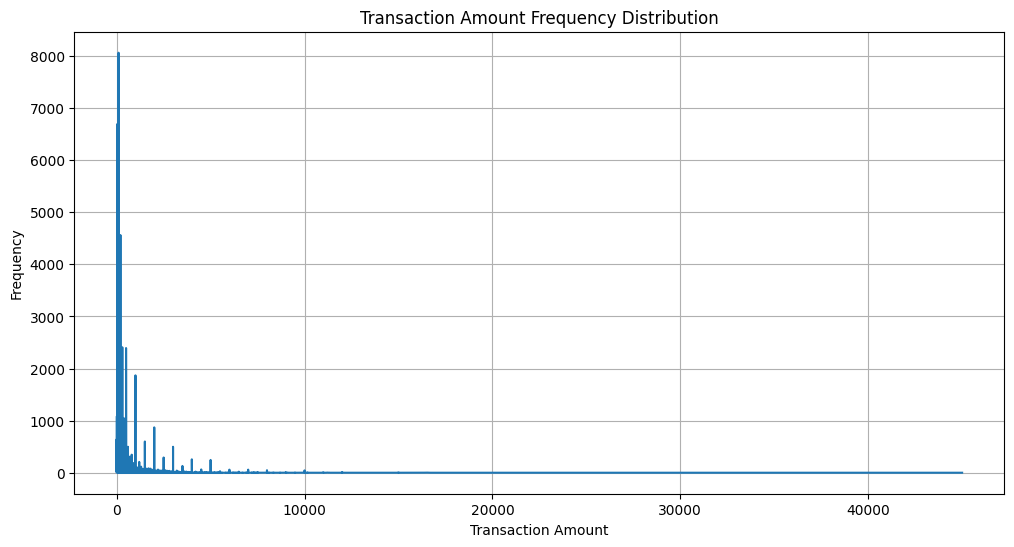

In [169]:
# Step 1: Get spend distribution from DuckDB into a DataFrame
spend_dist_df = duckdb.sql("""
    SELECT 
      transaction_amt,
      COUNT(*) AS frequency
    FROM transaction_fact_clean
    WHERE transaction_amt IS NOT NULL
    GROUP BY transaction_amt
    ORDER BY transaction_amt
""").df()

# Step 2: Confirm column names
print(spend_dist_df.columns)

# Step 3: Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.lineplot(data=spend_dist_df, x="transaction_amt", y="frequency")
plt.title("Transaction Amount Frequency Distribution")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


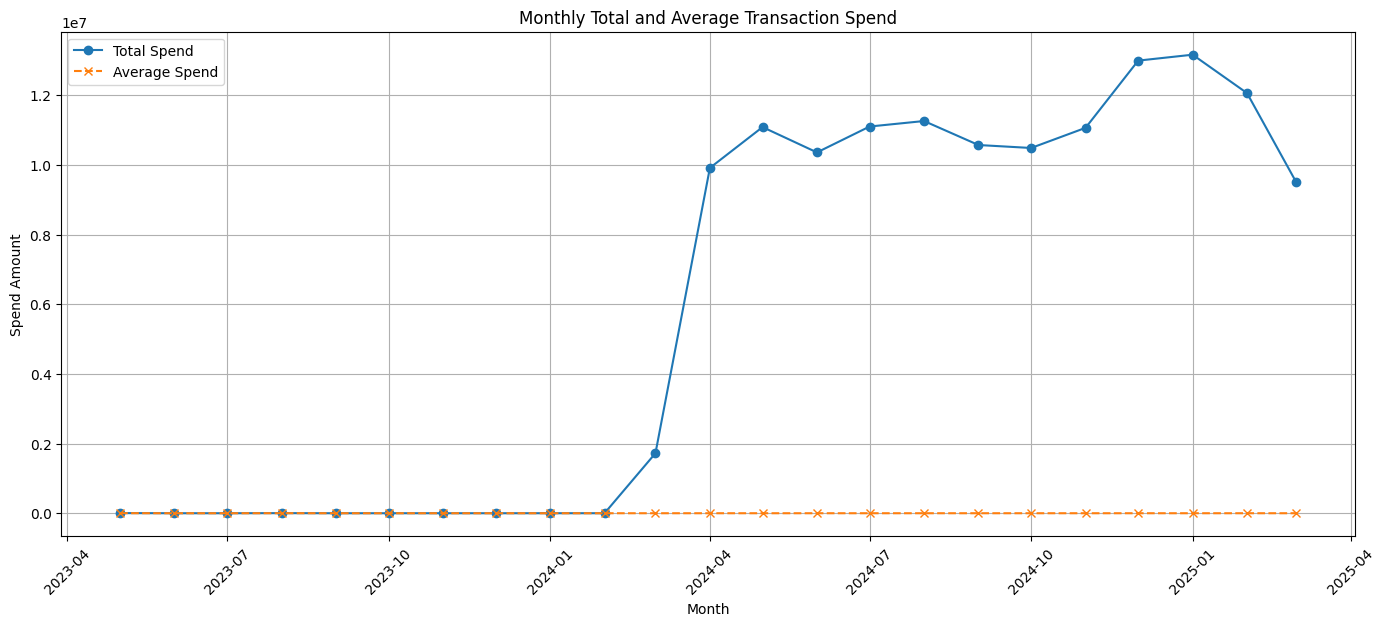

In [171]:
# Step 1: Run the query and get the result into a DataFrame
monthly_spend_df = duckdb.sql("""
    SELECT 
      STRFTIME(transaction_date, '%Y-%m') AS month,
      SUM(transaction_amt) AS total_spend,
      AVG(transaction_amt) AS avg_spend
    FROM transaction_fact_clean
    GROUP BY month
    ORDER BY month
""").df()

# Step 2: Convert month column to datetime
monthly_spend_df["month"] = pd.to_datetime(monthly_spend_df["month"])

# Step 3: Plot the data
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Plot total spend
plt.plot(monthly_spend_df["month"], monthly_spend_df["total_spend"], label="Total Spend", marker='o')

# Plot average spend
plt.plot(monthly_spend_df["month"], monthly_spend_df["avg_spend"], label="Average Spend", linestyle='--', marker='x')

# Styling
plt.title("Monthly Total and Average Transaction Spend")
plt.xlabel("Month")
plt.ylabel("Spend Amount")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


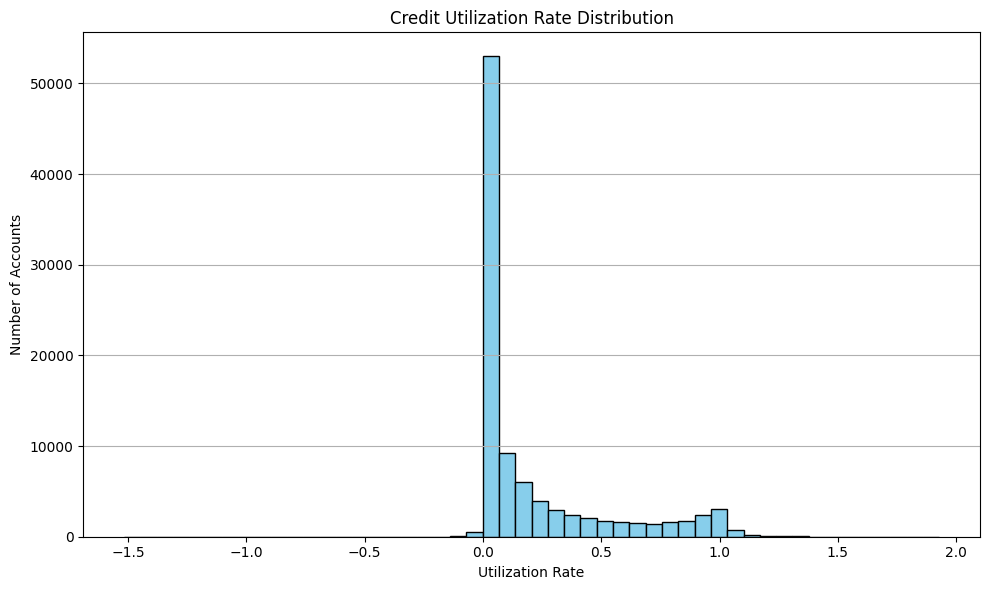

In [172]:
utilization_df = duckdb.sql("""
    SELECT 
      cu_account_nbr,
      cu_cur_balance / NULLIF(cu_crd_line, 0) AS utilization_rate
    FROM rams_batch_clean
    WHERE cu_crd_line IS NOT NULL AND cu_crd_line > 0;
""").df()

# Clean up data
utilization_df = utilization_df.dropna(subset=["utilization_rate"])
utilization_df = utilization_df[utilization_df["utilization_rate"] <= 5]

# Plot
plt.figure(figsize=(10, 6))
plt.hist(utilization_df["utilization_rate"], bins=50, color='skyblue', edgecolor='black')
plt.title("Credit Utilization Rate Distribution")
plt.xlabel("Utilization Rate")
plt.ylabel("Number of Accounts")
plt.grid(axis="y")
plt.tight_layout()
plt.show()

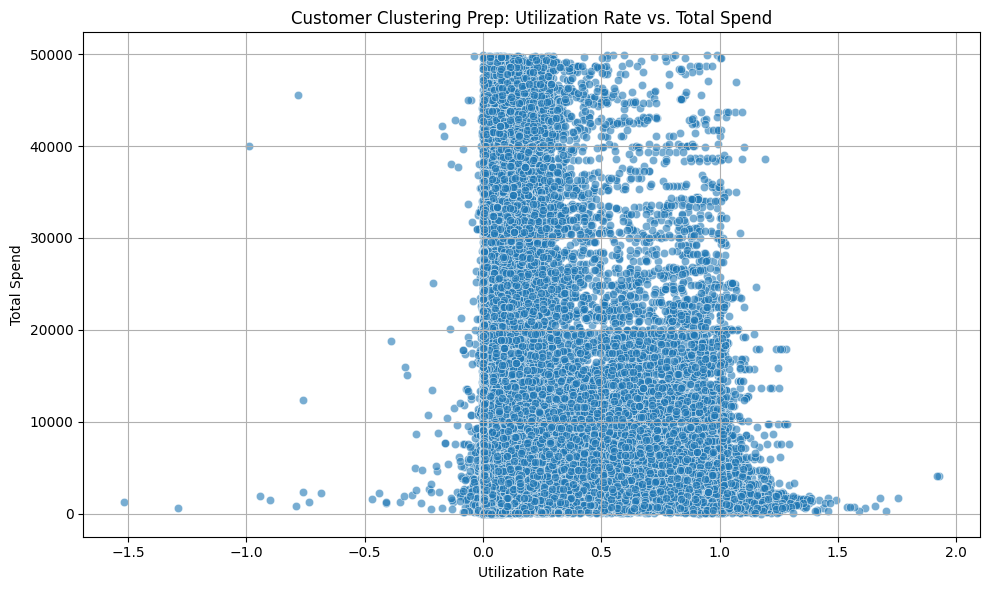

In [173]:
# Step 1: Run the DuckDB query and get the data as a DataFrame
clustering_df = duckdb.sql("""
    SELECT 
      r.cu_account_nbr,
      r.cu_cur_balance / NULLIF(r.cu_crd_line, 0) AS utilization_rate,
      SUM(t.transaction_amt) AS total_spend
    FROM rams_batch_clean r
    JOIN transaction_fact_clean t 
      ON r.cu_account_nbr = t.current_account_nbr
    GROUP BY r.cu_account_nbr, utilization_rate;
""").df()

# Step 2: Remove outliers or unrealistic data for better visualization (optional but recommended)
clustering_df = clustering_df.dropna()
clustering_df = clustering_df[(clustering_df["utilization_rate"] <= 5) & (clustering_df["total_spend"] <= 50000)]

# Step 3: Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=clustering_df, x="utilization_rate", y="total_spend", alpha=0.6)
plt.title("Customer Clustering Prep: Utilization Rate vs. Total Spend")
plt.xlabel("Utilization Rate")
plt.ylabel("Total Spend")
plt.grid(True)
plt.tight_layout()
plt.show()

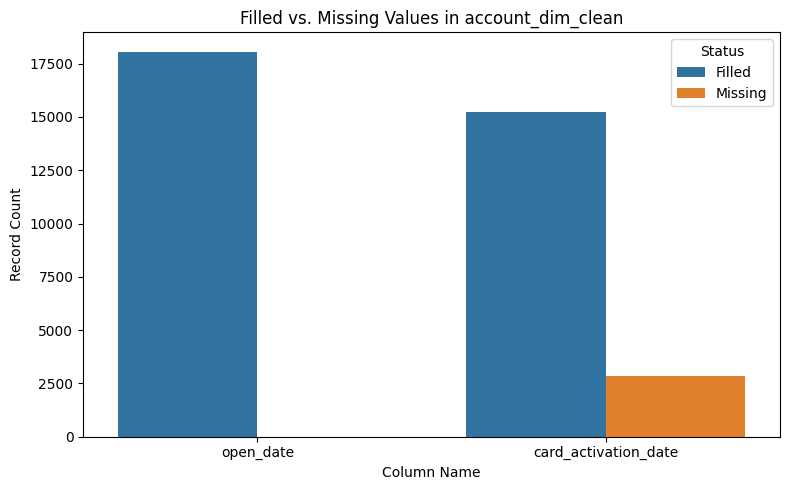

In [174]:
missing_df = duckdb.sql("""
    SELECT 
      COUNT(*) AS total_records,
      COUNT(open_date) AS filled_open_date,
      COUNT(card_activation_date) AS filled_activation_date
    FROM account_dim_clean;
""").df()

# Step 2: Reshape the data for visualization
total = int(missing_df["total_records"][0])
data = {
    "Column": ["open_date", "card_activation_date"],
    "Filled": [int(missing_df["filled_open_date"][0]), int(missing_df["filled_activation_date"][0])],
}
df_long = pd.DataFrame(data)
df_long["Missing"] = total - df_long["Filled"]

# Melt the dataframe for stacked bar chart
df_melted = df_long.melt(id_vars="Column", value_vars=["Filled", "Missing"], var_name="Status", value_name="Count")

# Step 3: Create bar plot
plt.figure(figsize=(8, 5))
sns.barplot(data=df_melted, x="Column", y="Count", hue="Status")
plt.title("Filled vs. Missing Values in account_dim_clean")
plt.ylabel("Record Count")
plt.xlabel("Column Name")
plt.tight_layout()
plt.show()

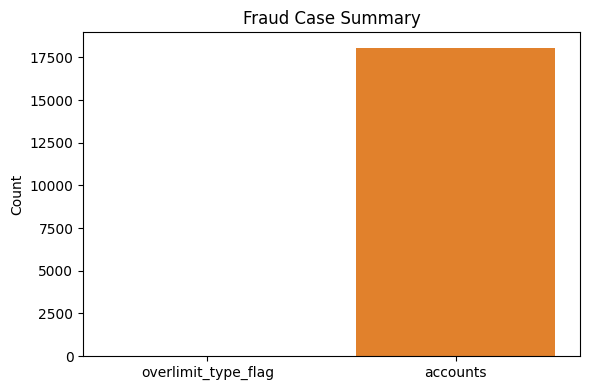

In [175]:
fraud_summary_df = duckdb.sql("""-- Count fraud cases
SELECT 
  COUNT(DISTINCT case_id) AS fraud_cases,
  COUNT(DISTINCT current_account_nbr) AS affected_accounts
FROM fraud_claim_case_clean;

-- Check overlimit and delinquency flags
SELECT 
  overlimit_type_flag,
  COUNT(*) AS accounts
FROM account_dim_clean
GROUP BY overlimit_type_flag;
""").df()

# Reshape for plotting
fraud_melted = fraud_summary_df.melt(var_name="Metric", value_name="Count")

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(data=fraud_melted, x="Metric", y="Count")
plt.title("Fraud Case Summary")
plt.ylabel("Count")
plt.xlabel("")
plt.tight_layout()
plt.show()

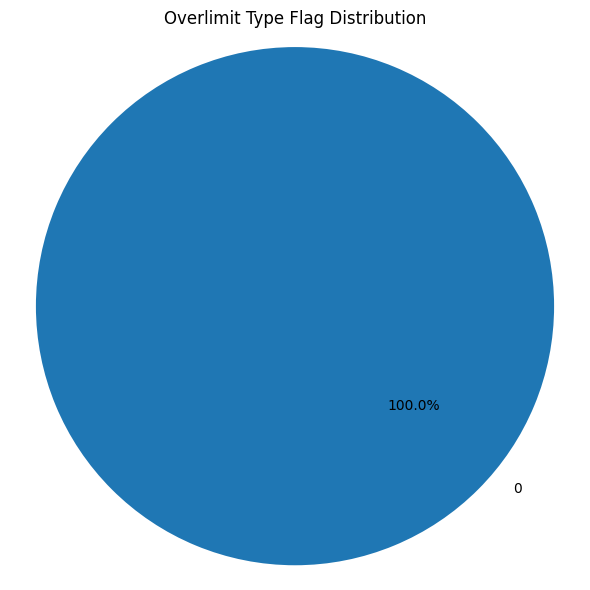

In [176]:
# Overlimit Flag Distribution
overlimit_df = duckdb.sql("""
    SELECT 
      overlimit_type_flag,
      COUNT(*) AS accounts
    FROM account_dim_clean
    GROUP BY overlimit_type_flag;
""").df()

# Replace nulls or empty values for clarity
overlimit_df["overlimit_type_flag"] = overlimit_df["overlimit_type_flag"].fillna("Unknown")

# Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(overlimit_df["accounts"], labels=overlimit_df["overlimit_type_flag"], autopct='%1.1f%%', startangle=140)
plt.title("Overlimit Type Flag Distribution")
plt.axis("equal")
plt.tight_layout()
plt.show()


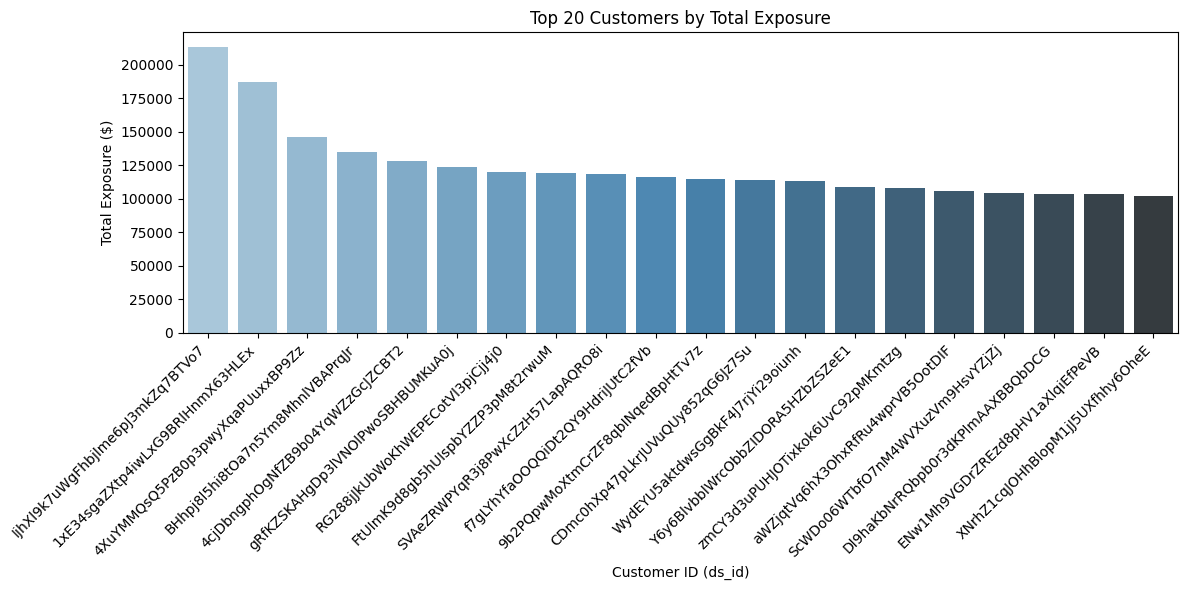

In [177]:
# Query: Total Exposure per Customer
exposure_df = duckdb.sql("""
    SELECT 
      s.ds_id,
      COUNT(DISTINCT s.account_nbr_pty) AS total_accounts,
      SUM(r.cu_cur_balance) AS total_exposure
    FROM syf_id_clean s
    JOIN rams_batch_clean r 
      ON s.account_nbr_pty = r.cu_account_nbr
    GROUP BY s.ds_id;
""").df()

# Sort top 20 customers by exposure for a focused view
top_customers = exposure_df.sort_values(by="total_exposure", ascending=False).head(20)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=top_customers, x="ds_id", y="total_exposure", palette="Blues_d")
plt.xticks(rotation=45, ha='right')
plt.title("Top 20 Customers by Total Exposure")
plt.xlabel("Customer ID (ds_id)")
plt.ylabel("Total Exposure ($)")
plt.tight_layout()
plt.show()

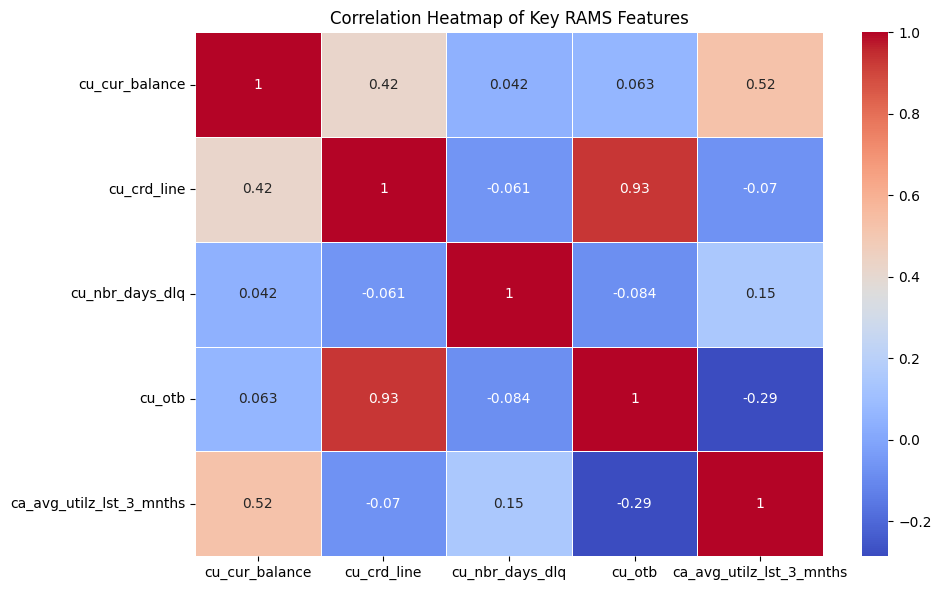

In [178]:
# Run the query and fetch the DataFrame
correlation_df = duckdb.sql("""
    SELECT 
      cu_cur_balance,
      cu_crd_line,
      cu_nbr_days_dlq,
      cu_otb,
      ca_avg_utilz_lst_3_mnths
    FROM rams_batch_clean;
""").df()

# Drop rows with missing values for accurate correlation calculation
correlation_df = correlation_df.dropna()

# Compute the correlation matrix
corr_matrix = correlation_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Key RAMS Features")
plt.tight_layout()
plt.show()

In [156]:
import pandas as pd


# 🧱 Step 1: Standardize column names
rams_df.rename(columns={"cu_account_nbr": "current_account_nbr"}, inplace=True)

# 📌 Step 2: Merge
merged_df = account_df.merge(rams_df, on="current_account_nbr", how="left")
merged_df = merged_df.merge(statement_df, on="current_account_nbr", how="left")

# 🧪 Quick check
print("✅ Merged shape:", merged_df.shape)
print("📋 Sample columns:", merged_df.columns.tolist()[:10])

# 🧾 Save to CSV for modeling
merged_df.to_csv("lightweight_merged_dataset.csv", index=False)


✅ Merged shape: (3248292, 55)
📋 Sample columns: ['current_account_nbr', 'client_id', 'open_date', 'card_activation_date', 'card_activation_flag', 'ebill_ind', 'date_in_collection', 'overlimit_type_flag', 'payment_hist_1_12_mths_x', 'payment_hist_13_24_mths']


In [179]:
# ISNT WORKING!!!!!!!!!!!!!!!!!!!!!!!!!




from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import pandas as pd

# Example: subset relevant numeric features
features = [
    "ca_avg_utilz_lst_6_mnths", "ca_avg_utilz_lst_3_mnths", "cu_cur_balance",
    "cu_otb", "cu_nbr_days_dlq", "rb_new_bhv_scr", "rb_crd_gr_new_crd_gr"
]

X = merged_df[features]

# Impute missing values
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)


ValueError: Cannot use median strategy with non-numeric data:
could not convert string to float: 'R'